### AI-09 Practice 1  

#### Import libraries  

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

#### Parameters  

In [40]:
csv_in = 'ai-10-quiz.csv'

#### Read CSV file  

In [41]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
df = df.dropna().reset_index(drop=True)
print(df.shape)
display(df.head())

(200, 4)


,f1,f2,f3,b
0,6.11,9.35,6.03,48.30
1,9.59,7.44,8.06,46.00
2,8.83,7.59,6.48,46.02
3,5.94,5.40,8.69,42.45
4,7.21,5.79,9.40,43.03


#### Get X and y  

In [42]:
X = df.loc[:, 'f1':'f3']  # explanatory variables
y = df['b']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (200, 3)


,f1,f2,f3
0,6.11,9.35,6.03
1,9.59,7.44,8.06
2,8.83,7.59,6.48
3,5.94,5.40,8.69
4,7.21,5.79,9.40


y: (200,)
0    48.30
1    46.00
2    46.02
3    42.45
4    43.03
Name: b, dtype: float64


#### Split X and y for train and test  

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=29)
print(X_train.head())

       f1    f2    f3
82   7.19  5.63  6.02
157  5.64  6.20  6.78
10   5.12  6.02  8.50
35   8.51  6.66  6.80
62   9.99  7.80  7.74


#### Scaling  

In [44]:
sc = MinMaxScaler(feature_range=(0, 1), copy=True)
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#### Parameters for SVR  

In [45]:
C = 1
gamma = 'scale'
epsilon = 0.01

#### Execute SVR  

In [46]:
svr = SVR(gamma=gamma, C=C, epsilon=epsilon)
svr.fit(X_train_std, y_train)

SVR(C=1, epsilon=0.01)

#### Do prediction using train data  

In [47]:
y_train_pred = svr.predict(X_train_std)

#### Scaling of Test data and do prediction  

In [48]:
X_test_std = sc.transform(X_test)
y_test_pred = svr.predict(X_test_std)

#### Check MSE  

In [49]:
mse_train = mean_squared_error(y_train_pred, y_train)
print('MSE (train):', mse_train)
mse_test = mean_squared_error(y_test_pred, y_test)
print('MSE (test):', mse_test)

MSE (train): 2.525959563720172
MSE (test): 2.661307134590273


**Ans. 0.478**  

#### Scatter plot of output of SVR (prediction) and true value for train / test data  

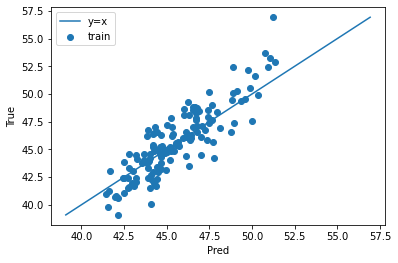

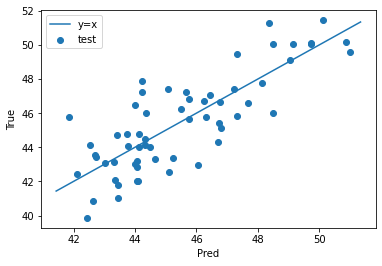

In [50]:
plt.scatter(y_train_pred, y_train, label='train')
xmin = np.array([y_train.min(), y_train.max()])
xmax = np.array([y_train.min(), y_train.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

plt.scatter(y_test_pred, y_test, label='test')
xmin = np.array([y_train_pred.min(), y_train_pred.max()])
xmax = np.array([y_train_pred.min(), y_train_pred.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

#### Save developed SVR model  

In [51]:
tag = 'ai-09-practice1'
sc_file = 'sc_{}.joblib'.format(tag)
dump(sc, sc_file)
model_file = 'svr_{}.joblib'.format(tag)
dump(svr, model_file)

['svr_ai-09-practice1.joblib']

In [52]:
print(y_train_pred)
print(y_train)

[44.19210264 43.66167476 42.1608984  46.33303378 47.22942421 41.65276472
 46.79081448 42.757213   41.57929446 47.03476905 46.1300309  47.68308318
 46.80017753 44.42960549 44.67217077 46.6658167  44.16951916 43.26971845
 45.21096756 44.6385576  44.59119811 46.3374364  43.65687747 44.11143816
 48.95128461 45.67006434 49.59981571 41.97971361 42.42996724 45.00494696
 44.03294468 43.90961808 51.33821906 46.11013829 44.68803723 47.64245857
 43.88602873 46.03260037 46.31051927 43.87583669 44.88984892 46.7453669
 47.41247439 49.77554626 43.87197141 43.54487006 47.08009809 45.27809445
 49.1052983  44.26615376 46.98026886 47.47657469 44.45766937 48.11767328
 44.8300357  46.2301151  44.37240198 42.76782191 45.41367182 43.95003562
 45.05020813 48.88143447 44.05215538 42.0462801  46.52671139 50.33467379
 46.68924247 43.1703803  46.8867416  46.10745036 48.87496195 51.04708712
 44.27652592 46.43457255 44.40623364 50.94720055 51.21088699 41.623384
 47.4720839  44.60054091 42.51649596 41.43349096 44.04